# Feature Extraction Techniques

reference:
https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be

### Mushroom Classification

In [57]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [58]:
df = pd.read_csv('/home/garvit/Datasets/archive (1)/mushrooms.csv')

In [59]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
print("Total no. of columns: ",len(df.columns))

Total no. of columns:  23


In [61]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [62]:
X = df.drop('class', axis=1)
y = df['class']

X = pd.get_dummies(X, prefix_sep='_')
X = StandardScaler().fit_transform(X)
y = LabelEncoder().fit_transform(y)

In [63]:
X

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [64]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print("Process Time: ",round(time.process_time() - start, 2))
    predictionforest = trainedforest.predict(X_Test)
    print("\nconfusion_matrix: ")
    print(confusion_matrix(Y_Test,predictionforest))
    print("\nclassification_report: ")
    print(classification_report(Y_Test,predictionforest))
    print("Train set score: ", trainedforest.score(X_Train, Y_Train))
    print("Test set score: ", trainedforest.score(X_Test, Y_Test))

In [65]:
forest_test(X, y)

Process Time:  1.49

confusion_matrix: 
[[1274    0]
 [   0 1164]]

classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Train set score:  1.0
Test set score:  1.0


## Feature Extraction

### **1- Principle Components Analysis (PCA)**

#### PCA with 2 components

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis=1)
PCA_df['class'] = y
PCA_df.head()

,PC1,PC2,class
0,-3.284799,1.020163,1
1,-3.969476,-0.856868,0
2,-4.958584,-0.211046,0
3,-3.470016,0.337974,1
4,-2.726564,0.889660,0


In [79]:
print("EigenVectors: ", pca.explained_variance_)

EigenVectors:  [10.31484925  9.42671062]


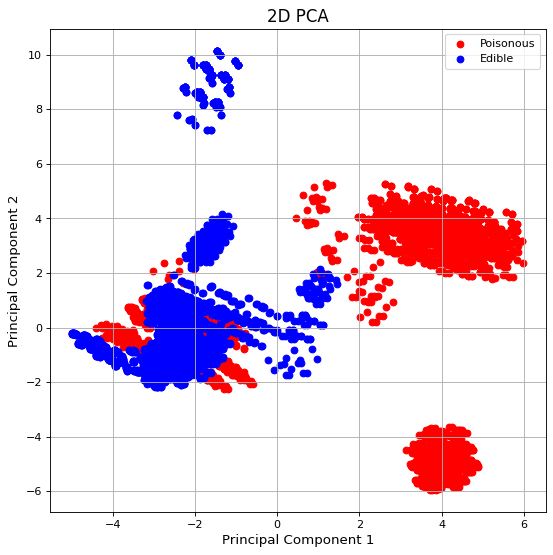

In [80]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [82]:
pca = PCA(n_components=2, svd_solver='full')
X_pca = pca.fit_transform(X)

forest_test(X_pca, y)

Process Time:  2.95

confusion_matrix: 
[[1241   33]
 [  93 1071]]

classification_report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1274
           1       0.97      0.92      0.94      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

Train set score:  1.0
Test set score:  0.948318293683347


#### PCA with 3 components

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2', 'PC3'])
PCA_df = pd.concat([PCA_df, df['class']], axis=1)
PCA_df['class'] = y
PCA_df.head()

,PC1,PC2,PC3,class
0,-3.284767,1.020073,-1.353475,1
1,-3.969462,-0.856876,0.237437,0
2,-4.958583,-0.211111,0.466417,0
3,-3.469998,0.337902,-1.334865,1
4,-2.726564,0.889660,-2.051875,0


In [84]:
print("EigenVectors: ", pca.explained_variance_)

EigenVectors:  [10.31484926  9.42671062  8.35720548]


In [85]:
print('PC1 max: ',max(PCA_df['PC1']), "PC2 max: ",max(PCA_df['PC2']), "PC3 max: ",max(PCA_df['PC3']))

PC1 max:  5.978490394973923 PC2 max:  10.152665741219792 PC3 max:  16.66960306190201


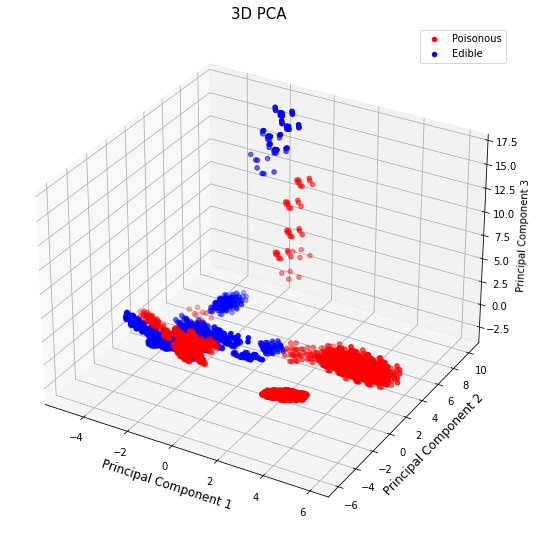

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2', 'PC3'])
PCA_df = pd.concat([PCA_df, df['class']], axis=1)
PCA_df['class'] = y
PCA_df.head()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

classes = [1, 0]
colors = ['r', 'b', 'black']
for clas, color in zip(classes, colors):
    ax.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
               PCA_df.loc[PCA_df['class'] == clas, 'PC2'],
               PCA_df.loc[PCA_df['class'] == clas, 'PC3'],
               c = color)

plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()
plt.show()

In [87]:
pca = PCA(n_components=3, svd_solver='full')
X_pca = pca.fit_transform(X)

forest_test(X_pca, y)

Process Time:  2.78

confusion_matrix: 
[[1260   14]
 [  39 1125]]

classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Train set score:  1.0
Test set score:  0.9782608695652174


### **2- Independent Component Analysis (ICA)**

ICA tries to maximize the independence between features, i.e it tries to define a linear transformation of the feature space into a new feature space such that each of individual new feature are mutually independent (their mutual information is equal to zero i.e $I(y_i, y_j)=0$ )

In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

forest_test(X_ica, Y)

In [ ]:
# $$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $$

$$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $$

$$Y^2$$